In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\jaikr\OneDrive\Desktop\6-month-Data-Sci-Training\richa\lib\Used_Bikes.csv")
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [3]:
##dta preprocessing--checking for null values,DUPlication,datatypes,shape of data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [4]:
df.isnull().sum() #no null values

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(25324)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.head()
##feature selection -- columns which are not required for analysis

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [8]:
cat_col=df.select_dtypes(include=['object'])
cat_col.drop(['city','bike_name'],axis=1,inplace=True)
cat_col.head()


,owner,brand
0,First Owner,TVS
1,First Owner,Royal Enfield
2,First Owner,Triumph
3,First Owner,TVS
4,First Owner,Yamaha


In [9]:
num_col = df.select_dtypes(exclude=['object'])
num_col.head()

,price,kms_driven,age,power
0,35000.0,17654.0,3.0,110.0
1,119900.0,11000.0,4.0,350.0
2,600000.0,110.0,8.0,675.0
3,65000.0,16329.0,4.0,180.0
4,80000.0,10000.0,3.0,150.0


In [10]:
##to convert categorical data into numerical data we have - one hot encoding, label encoding
##one hot encoding --- 
pd.get_dummies(cat_col).astype(int).head()


,owner_First Owner,owner_Fourth Owner Or More,owner_Second Owner,owner_Third Owner,brand_BMW,brand_Bajaj,brand_Benelli,brand_Ducati,brand_Harley-Davidson,brand_Hero,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
##label encoding 
dt= { "First Owner" : 1,
     
     "Second Owner" : 2,
     
     "Third Owner" : 3,
     
     "Fourth Owner Or More" : 4

}

cat_col['owner'] = cat_col['owner'].map(dt)
cat_col.head()






,owner,brand
0,1,TVS
1,1,Royal Enfield
2,1,Triumph
3,1,TVS
4,1,Yamaha


In [12]:
##scikit-learn // sklearn -- library for machine learning
# pip install 

In [13]:
##for brand column


{i:key for key , i in enumerate(list(cat_col['brand'].unique()))}


{'TVS': 0,
 'Royal Enfield': 1,
 'Triumph': 2,
 'Yamaha': 3,
 'Honda': 4,
 'Hero': 5,
 'Bajaj': 6,
 'Suzuki': 7,
 'Benelli': 8,
 'KTM': 9,
 'Mahindra': 10,
 'Kawasaki': 11,
 'Ducati': 12,
 'Hyosung': 13,
 'Harley-Davidson': 14,
 'Jawa': 15,
 'BMW': 16,
 'Indian': 17,
 'Rajdoot': 18,
 'LML': 19,
 'Yezdi': 20,
 'MV': 21,
 'Ideal': 22}

In [14]:
dt2={'TVS': 0,
 'Royal Enfield': 1,
 'Triumph': 2,
 'Yamaha': 3,
 'Honda': 4,
 'Hero': 5,
 'Bajaj': 6,
 'Suzuki': 7,
 'Benelli': 8,
 'KTM': 9,
 'Mahindra': 10,
 'Kawasaki': 11,
 'Ducati': 12,
 'Hyosung': 13,
 'Harley-Davidson': 14,
 'Jawa': 15,
 'BMW': 16,
 'Indian': 17,
 'Rajdoot': 18,
 'LML': 19,
 'Yezdi': 20,
 'MV': 21,
 'Ideal': 22}

In [15]:
cat_col['brand'] = cat_col['brand'].map(dt2)
cat_col.head()

,owner,brand
0,1,0
1,1,1
2,1,2
3,1,0
4,1,3


In [16]:
cat_col,num_col


(      owner  brand
 0         1      0
 1         1      1
 2         1      2
 3         1      0
 4         1      3
 ...     ...    ...
 9362      1      5
 9369      1      6
 9370      1     14
 9371      1      6
 9372      1      6
 
 [7324 rows x 2 columns],
          price  kms_driven  age  power
 0      35000.0     17654.0  3.0  110.0
 1     119900.0     11000.0  4.0  350.0
 2     600000.0       110.0  8.0  675.0
 3      65000.0     16329.0  4.0  180.0
 4      80000.0     10000.0  3.0  150.0
 ...        ...         ...  ...    ...
 9362   25000.0     48587.0  8.0  150.0
 9369   35000.0     60000.0  9.0  220.0
 9370  450000.0      3430.0  4.0  750.0
 9371  139000.0     21300.0  4.0  400.0
 9372   80000.0      7127.0  5.0  220.0
 
 [7324 rows x 4 columns])

In [17]:
final_df=pd.concat([cat_col,num_col],axis=1)
final_df.head()

,owner,brand,price,kms_driven,age,power
0,1,0,35000.0,17654.0,3.0,110.0
1,1,1,119900.0,11000.0,4.0,350.0
2,1,2,600000.0,110.0,8.0,675.0
3,1,0,65000.0,16329.0,4.0,180.0
4,1,3,80000.0,10000.0,3.0,150.0


In [18]:
matrix = final_df.corr()
matrix

,owner,brand,price,kms_driven,age,power
owner,1.000000,0.005844,-0.005188,0.062612,0.203151,0.043746
brand,0.005844,1.000000,0.288409,-0.036161,-0.030263,0.068647
price,-0.005188,0.288409,1.000000,-0.199951,-0.248752,0.807641
kms_driven,0.062612,-0.036161,-0.199951,1.000000,0.367518,-0.168295
age,0.203151,-0.030263,-0.248752,0.367518,1.000000,-0.164211
power,0.043746,0.068647,0.807641,-0.168295,-0.164211,1.000000


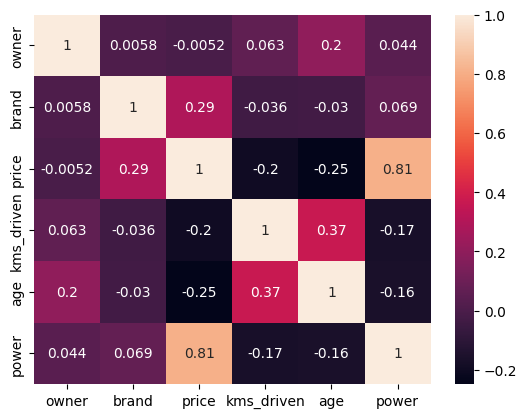

In [19]:
sns.heatmap(matrix,annot=True)
plt.show()

In [20]:
## dividing data into dependent and independent variables
x= final_df.drop('price',axis=1)
y = final_df['price']

In [21]:
x,y

(      owner  brand  kms_driven  age  power
 0         1      0     17654.0  3.0  110.0
 1         1      1     11000.0  4.0  350.0
 2         1      2       110.0  8.0  675.0
 3         1      0     16329.0  4.0  180.0
 4         1      3     10000.0  3.0  150.0
 ...     ...    ...         ...  ...    ...
 9362      1      5     48587.0  8.0  150.0
 9369      1      6     60000.0  9.0  220.0
 9370      1     14      3430.0  4.0  750.0
 9371      1      6     21300.0  4.0  400.0
 9372      1      6      7127.0  5.0  220.0
 
 [7324 rows x 5 columns],
 0        35000.0
 1       119900.0
 2       600000.0
 3        65000.0
 4        80000.0
           ...   
 9362     25000.0
 9369     35000.0
 9370    450000.0
 9371    139000.0
 9372     80000.0
 Name: price, Length: 7324, dtype: float64)

In [22]:
##splitting data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5859, 5), (1465, 5), (5859,), (1465,))

In [24]:
##model building
from sklearn.linear_model import LinearRegression

In [25]:

lr=LinearRegression()

In [26]:
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
lr.score(x_test,y_test)

0.6904777011031207

In [28]:
lr.score(x_train,y_train)

0.7267911004967926

In [29]:
##predicting the values
y_pred=lr.predict(x_test)
y_pred

array([-45942.68064976,  22949.98542192, 107359.75908277, ...,
       211598.2483689 ,  41165.45863843,  63987.73578151])

In [30]:
##prdict value for a single row
lr.predict([[1,4,18000,7,125]])

c:\Users\jaikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19154.71225224])

In [31]:
##checking the accuracy of the model
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)


4177523190.3379145

In [32]:
x_test

,owner,brand,kms_driven,age,power
9155,1,0,17602.0,13.0,110.0
8237,1,5,25392.0,4.0,100.0
5528,1,1,31298.0,12.0,350.0
7670,1,21,6898.0,6.0,800.0
76,1,3,3900.0,2.0,250.0
...,...,...,...,...,...
1320,1,11,6500.0,4.0,650.0
9091,1,0,20238.0,10.0,110.0
258,1,6,3694.0,4.0,400.0
1154,1,6,46333.0,5.0,125.0


In [33]:
##storing actual and predicted values side by side
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1.head()


,Actual,Predicted
9155,14000.0,-45942.680650
8237,40000.0,22949.985422
5528,50000.0,107359.759083
7670,950000.0,573780.592126
76,146000.0,103178.036247


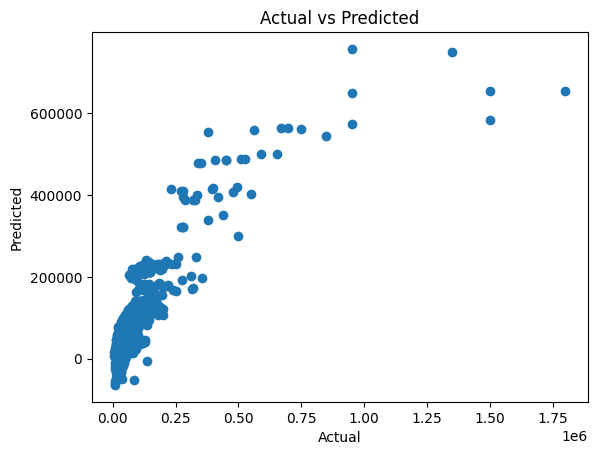

In [34]:
##plotting the actual and predicted values
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()



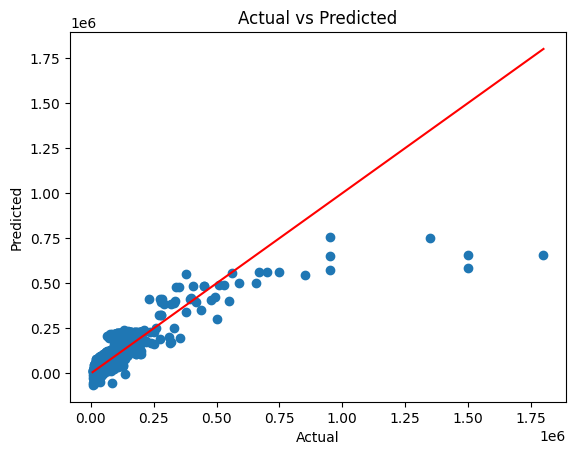

In [35]:
#plot best fit line
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red')

In [36]:
##saving the model --- pickle , joblib 
#joblib 
import joblib
joblib.dump(lr,'bike_price_prediction.pkl')


['bike_price_prediction.pkl']

In [37]:
##random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8764940510408388

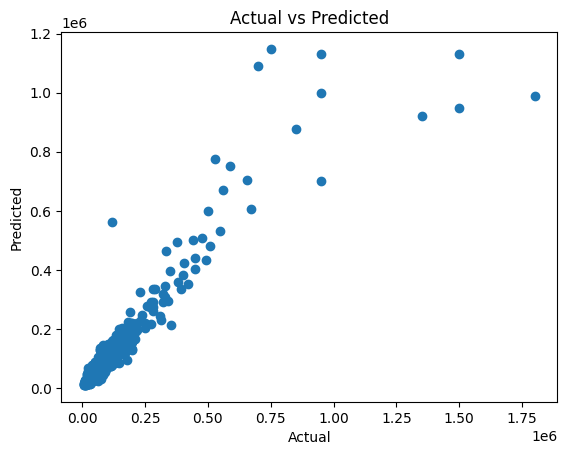

In [38]:
plt.scatter(y_test,rf.predict(x_test))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()
